# Hello ! Welcome to My First End to End Maching Learning Project. 
** In this notebook, I will explore a very iteresting set of data, my own dota2 matches. The data is taken from opendota.com through api calls. I won't go into details about how I get them here( the data source is from opendota). Rather, in this notebook, I will explore features of my matches that contribute to me winning my games. **

In [1]:
import pandas as pd
import numpy as np


## Introduction
Dota2 is a strategic game in which two teams(Radiant vs Dire) will play against each other in a match. Each team consists of 5 players that will have to work together to take the best use of the in-game resources to win the match. In order for a team to win a match, they will have to destroy the opposing team's ancient throne before theirs get destroyed by their opponents. Each player will play the game using one of the heroes in a pool of about 128 heroes (there might have been more added heroes now, that's why I give an estimate here). Each hero has their own set of abilities that could assist players in achieving their ultimate goal of destroying their opponents' ancient throne.  

Now let's load my dota2 dataset

In [2]:
### load the dataset from my file location
df = pd.read_csv(r'C:\Users\tnguy\Desktop\resultss.csv', encoding = 'utf8')
df.apply(lambda x: pd.lib.infer_dtype(x.values))

C:\Users\tnguy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (27,59,62,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\tnguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.lib is deprecated and will be removed in a future version.
You can access infer_dtype as pandas.api.types.infer_dtype
  


abandons                    integer
account_id                 floating
actions_per_min            floating
ancient_kills              floating
assists                     integer
backpack_0                 floating
backpack_1                 floating
backpack_2                 floating
buyback_count              floating
camps_stacked              floating
cluster                     integer
courier_kills              floating
creeps_stacked             floating
deaths                      integer
denies                      integer
duration                    integer
firstblood_claimed         floating
game_mode                   integer
gold                       floating
gold_per_min                integer
gold_spent                 floating
hero_damage                floating
hero_healing               floating
hero_id                     integer
hero_kills                 floating
isRadiant                   boolean
is_contributor              boolean
is_roaming                  

Let's take a look at the first 5 examples in my dataset

In [3]:
### get the first 5 rows of my match data
df.head()

,abandons,account_id,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,camps_stacked,...,start_time,stuns,teamfight_participation,total_gold,total_xp,tower_damage,tower_kills,towers_killed,win,xp_per_min
0,0,381798591.0,131.0,0.0,10,0.0,0.0,0.0,0.0,0.0,...,1527006038,26.178345,0.500000,22246,27965.0,4784.0,3.0,3.0,1,714
1,0,NaN,176.0,0.0,12,0.0,0.0,0.0,0.0,3.0,...,1527006038,0.000000,0.526316,16724,18721.0,1458.0,0.0,0.0,1,478
2,0,NaN,192.0,0.0,17,0.0,0.0,0.0,0.0,0.0,...,1527006038,43.595947,0.684211,13238,14961.0,381.0,0.0,0.0,1,382
3,0,110870904.0,150.0,0.0,17,0.0,0.0,0.0,0.0,0.0,...,1527006038,7.492188,0.578947,14530,20249.0,83.0,0.0,0.0,1,517
4,0,NaN,94.0,12.0,9,182.0,0.0,181.0,0.0,0.0,...,1527006038,0.000000,0.368421,23539,27886.0,7723.0,2.0,2.0,1,712


The dataset contains 88 features in a match with information about all ten individual players in the same match

Let's get my match details

In [4]:
### get my match_details using my account_id
df_my_match = df[df['account_id'] == 120236951] 


In [5]:
### get a general view of the distribution of my matches' features
df_my_match.describe()

,abandons,account_id,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,camps_stacked,...,start_time,stuns,teamfight_participation,total_gold,total_xp,tower_damage,tower_kills,towers_killed,win,xp_per_min
count,2947.000000,2947.0,562.000000,577.000000,2947.00000,1217.000000,1217.000000,1217.000000,577.000000,354.000000,...,2.947000e+03,532.000000,159.000000,2947.000000,2946.000000,2656.000000,577.000000,159.00000,2947.000000,2947.000000
mean,0.003393,120236951.0,116.421708,5.774697,12.27791,35.657354,20.450288,12.803615,0.483536,0.387006,...,1.459668e+09,23.838787,0.592307,20350.437394,21594.756280,2376.321160,1.448873,1.54717,0.501866,513.122837
std,0.058163,0.0,27.892110,9.090852,6.68807,63.816362,50.635365,41.692839,0.716974,1.090755,...,4.781280e+07,29.393957,0.145757,8469.200424,8242.339394,2840.554363,1.720355,1.64470,0.500081,138.915350
min,0.000000,120236951.0,39.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-6.384017,0.000000,703.000000,435.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,120236951.0,98.250000,0.000000,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.430503e+09,0.200549,0.513900,14063.500000,15230.500000,216.750000,0.000000,0.00000,0.000000,415.000000
50%,0.000000,120236951.0,110.500000,2.000000,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.461958e+09,14.457111,0.620690,19532.000000,21559.500000,1109.000000,1.000000,1.00000,1.000000,521.000000
75%,0.000000,120236951.0,125.750000,9.000000,16.00000,46.000000,0.000000,0.000000,1.000000,0.000000,...,1.491524e+09,36.181525,0.692308,25468.000000,27933.500000,3760.000000,2.000000,2.00000,1.000000,615.500000
max,1.000000,120236951.0,207.000000,96.000000,45.00000,265.000000,265.000000,265.000000,5.000000,16.000000,...,1.527006e+09,192.823560,0.897959,58020.000000,59238.000000,16839.000000,9.000000,7.00000,1.000000,934.000000


Accordingly, there are 79 features with numeric data (this includes bolean features with values of either 1 or 0, corresponding to True or False). That means there are 9 features with non-numerical data. Let's see what they are

In [6]:
### get the type of data from mydata table 
df_my_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 7 to 29469
Data columns (total 88 columns):
abandons                   2947 non-null int64
account_id                 2947 non-null float64
actions_per_min            562 non-null float64
ancient_kills              577 non-null float64
assists                    2947 non-null int64
backpack_0                 1217 non-null float64
backpack_1                 1217 non-null float64
backpack_2                 1217 non-null float64
buyback_count              577 non-null float64
camps_stacked              354 non-null float64
cluster                    2947 non-null int64
courier_kills              577 non-null float64
creeps_stacked             354 non-null float64
deaths                     2947 non-null int64
denies                     2947 non-null int64
duration                   2947 non-null int64
firstblood_claimed         159 non-null float64
game_mode                  2947 non-null int64
gold                       2656

So the non-numeric geatures are: 

- ** isRadiant** 
- ** iscontributor**
- ** is_roaming**
- ** last_login**
- ** name**
- ** performance_others**
- ** pred_vict**
- ** radiant_win **
- ** rank_tier
  **

## Numeric Features

It's logical to investigate numeric features for my analytical purpose. The first step is to deal with null values. I'll delete any feature with more than 2000 missing values since it is approximately 90% of the data.

In [7]:
Missing_values = df_my_match.isnull().sum().sort_values(ascending = False)
print(Missing_values)

repicked                   2947
name                       2947
rank_tier                  2947
performance_others         2947
purchase_rapier            2941
purchase_gem               2927
party_size                 2797
towers_killed              2788
firstblood_claimed         2788
teamfight_participation    2788
roshans_killed             2788
purchase_ward_sentry       2787
purchase_ward_observer     2771
pred_vict                  2680
randomed                   2680
obs_placed                 2594
sen_placed                 2594
camps_stacked              2593
creeps_stacked             2593
rune_pickups               2593
life_state_dead            2443
party_id                   2432
stuns                      2415
pings                      2396
actions_per_min            2385
buyback_count              2370
observer_uses              2370
courier_kills              2370
necronomicon_kills         2370
lane_kills                 2370
                           ... 
duration

In [8]:
### delete any features with more than 2000 missing values
to_be_delete = []
for index, val in Missing_values.iteritems():
    if val >= 2000:
        to_be_delete.append(index)


df1 = df_my_match.copy()       
df1.drop([col for col in to_be_delete], inplace = True, axis = 1)
df1.head()
print (len(to_be_delete))

43


,abandons,account_id,assists,backpack_0,backpack_1,backpack_2,cluster,deaths,denies,duration,...,patch,player_slot,radiant_win,region,start_time,total_gold,total_xp,tower_damage,win,xp_per_min
7,0,120236951.0,9,46.0,77.0,38.0,152,7,13,2350,...,34.0,130,True,5.0,1527006038,17585,18095.0,204.0,0,462
13,0,120236951.0,6,36.0,0.0,0.0,155,2,32,2333,...,34.0,3,False,5.0,1527002098,22085,26207.0,776.0,0,674
29,0,120236951.0,12,0.0,0.0,46.0,156,4,21,3138,...,34.0,132,False,5.0,1526954973,32321,28189.0,4359.0,1,539
35,0,120236951.0,16,46.0,182.0,0.0,156,9,5,2683,...,34.0,128,False,5.0,1526951613,22224,27947.0,436.0,1,625
40,0,120236951.0,17,0.0,100.0,0.0,155,5,10,3043,...,34.0,0,True,5.0,1526916086,35907,38341.0,3501.0,1,756


So there are 43 features with approximately 90% of the value missing.

Based on the information provide by the schema from open dota, I can delete account_id and is_contributor from my dataframe as they do not provide any useful information.

In [9]:
### drop the features
df1.drop('account_id', inplace = True, axis =1)
df1.drop('is_contributor', inplace = True, axis =1)

###  Correlation among numerical values 

Correlation matrix always helps show strong correlation between numerical features with my wins. Below is the correlation matrix that shows by descending order, the degree of association between features and my wins. 

In [10]:
### compute correlation among features and my wins
corr_matrix = df1.corr()
corr_matrix['win'].sort_values(ascending = False)


win              1.000000
gold             0.566857
tower_damage     0.556291
gold_per_min     0.546683
kda              0.490050
xp_per_min       0.415524
kills_per_min    0.369223
total_gold       0.344635
assists          0.325071
kills            0.312939
gold_spent       0.307307
level            0.266810
total_xp         0.255308
item_5           0.139830
last_hits        0.123430
item_4           0.105588
hero_damage      0.094971
item_3           0.079682
denies           0.068971
item_1           0.067397
backpack_2       0.061453
item_2           0.047824
hero_healing     0.039092
item_0           0.032573
isRadiant        0.031556
start_time       0.015991
backpack_0       0.014403
game_mode        0.010632
match_id         0.008683
backpack_1       0.005032
duration         0.004865
patch            0.003946
radiant_win      0.000222
cluster         -0.007625
region          -0.009202
hero_id         -0.025736
lobby_type      -0.029352
player_slot     -0.031583
abandons    

In [11]:
### print the number of features
print(len(corr_matrix))

42


So the features with correlation >= 5% are:

In [12]:
cols_to_use = ['gold', 'tower_damage', 'gold_per_min', 'kda', 'xp_per_min', 'kills_per_min', 
               'total_gold', 'assists', 'kills', 'gold_spent', 'level', 'total_xp', 'item_5', 
               'last_hits', 'item_4', 'hero_damage', 'item_3', 'denies', 'item_1', 'backpack_2', 'abandons', 'leaver_status', 'deaths']

I want to see if any of these features are highly correlated with each other. My definition of positively high correlation is any score above 70% and negatively correlation is about 60%.

Text(0.5,1,'Correlation Matrix')

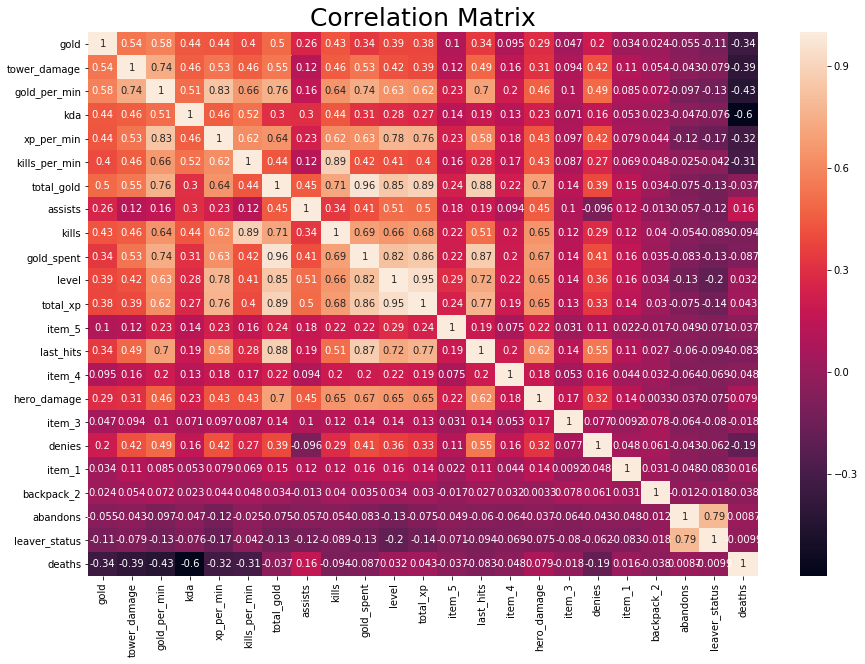

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(df1[cols_to_use].corr(), annot = True)
plt.title("Correlation Matrix", size = 25)

First let's take a look at what these features are from opendota:
- **total_xp**	
integer
Total experience at the end of the game
- **kills_per_min**	
number
Number of kills per minute
- **kda**	
number
kda (kills/deaths/assists)
- **tower_damage**	
integer
Total tower damage done by the player
- **level**	
integer
Level at the end of the game
- **item_1**                                                             
integer
Item in the player's second slot
- **item_2**	
integer
Item in the player's third slot
- **item_3**	
integer
Item in the player's fourth slot
- **item_4**	
integer
Item in the player's fifth slot
- **item_5**	
integer
Item in the player's sixth slot
- **hero_damage**	
integer
Hero Damage Dealt
- **gold_spent**	
integer
How much gold the player spent
- **gold**	
integer
Gold at the end of the game
- **gold_per_min**	
integer
Gold Per Minute obtained by this player
- **assists**	
integer
Number of assists the player had
- **deaths**	
integer
Number of deaths
- **denies**	
integer
Number of denies
- **kills**	
integer
Number of kills
- **leaver_status**	
integer
Integer describing whether or not the player left the game. 0: didn't leave. 1: left safely. 2+: Abandoned
- **backpack_2**	
integer
Item in backpack slot 2
- **last_hits**	
integer
Number of last hits




According to the correlation matrix:
* tower_damage is highly correlated with gold_per_min
* gold_per_min is highly correlated with xp_per_min, gold_spent, last_hits, tower damage, total_gold
* kda is highly negatively correlated with deaths
* xp_per_min is highly correlated with gold_per_min, level, total_xp
* kills_per_min is highly correlated with kills
* total_gold is highly correlated with gold_per_min, kills, gold_spent, level, total_xp, last_hits, hero_damage
* kills is highgly correlated with kills_per_mins, total_gold
* gold_spent is highly correlated with total_gold, level, total_xp, last_hits
* level is highly correlated with xp_per_min, total_gold, gold_spent, total_xp, last_hits
* total_xp is highly correlated with total_gold, gold_spent, level, last_hits
* last_hits is highly correlated with gold_per_min, total_gold, gold_spent, level, total_xp
* leaver status and abandons are highly correlated.

One assumption I have to make is that players at my rank understand dota2 (which is true) and how to play the game. Thus, at any point in time of the game, players in my matches know what they have to do (for example, spending gold, moving, etc...)

Based on my understanding of Dota2, xp_per_min, gold_spent, last_hits, tower damage, total_gold are the causes for fluctuations in gold_per_min. Thus, I will delete gold_per_min feature and keep the others. I'll keep deaths feature since I already have assists and kills features. Xp_per_min can be deleted and replaced with level and total_xp. So far the features I'll keep is **'gold', 'tower_damage', 'kda', 'kills_per_min', 'total_gold', 'assists', 'kills', 'gold_spent', 'level', 'total_xp', 'item_5', 'last_hits', 'item_4', 'hero_damage', 'item_3', 'denies', 'item_1', 'backpack_2', 'abandons', 'leaver_status'**. I'll keep kills_per_min instead of kills because the kills feature is also correlated with other features. I can also delete total_gold since it can be attributed to level, total_xp, last_hits, hero_damage. So the features I'll keep until now are ** 'gold', 'tower_damage', 'kda', 'kills_per_min', 'assists', 'gold_spent', 'level', 'total_xp', 'item_5', 'last_hits', 'item_4', 'hero_damage', 'item_3', 'denies', 'item_1', 'backpack_2', 'abandons', 'leaver_status' **. Since gold_spent is highly correlated with the features we already have, I can delete it. It seems that level, total_xp, and last_hits are highly correlated with one another. Based on my understanding, last_hits can combine with level to get total_xp. Thus, I'll delete total_xp from my features. Therefore, I'm left with **'gold', 'tower_damage', 'kda', 'kills_per_min', 'assists', 'gold_spent', 'level', 'item_5', 'last_hits', 'item_4', 'hero_damage', 'item_3', 'denies', 'item_1', 'backpack_2', 'abandons', 'leaver_status'**. I'll keep leaver_status as it encompasses abandons. From my understanding of Dota2, the 'gold' feature is highly correlated with a lot of other features. I will not keep it. Hence, my final set of features to consider is:
- **'tower_damage', 'kda', 'kills_per_min', 'assists', 'gold_spent', 'level', 'item_5', 'last_hits', 'item_4', 'hero_damage', 'item_3', 'denies', 'item_1', 'backpack_2', 'leaver_status'**.

## Non-numeric Features 

Here are the 9 non-numeric features
- ** isRadiant** 
- ** is_contributor**
- ** isroaming**
- ** last_login**
- ** name**
- ** performance_others**
- ** pred_vict**
- ** radiant_win **
- ** rank_tier **

In [14]:
non_numeric_features = ['last_login', 'isRadiant', 'name', 'performance_others', 'pred_vict','radiant_win', 'rank_tier', 'is_roaming'] 
for i in non_numeric_features:
    print(i in df1.columns)

True
True
False
False
False
True
False
False


name, performance_others, pred_vict, rank_tier, is_roaming have been deleted because of missing values. Only last_login, isRadiant and radiant_win remain. Let's take a look at the their missing values

In [15]:
df1[['last_login', 'isRadiant','radiant_win']].isnull().sum().sort_values(ascending = False)

radiant_win    0
isRadiant      0
last_login     0
dtype: int64

Great there are no missing values. Let's investigate their distributions

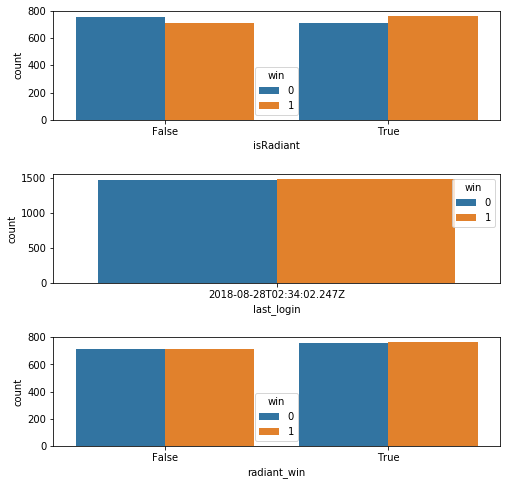

In [16]:
### graphing categorical features' distributions in ralation with my wins
import seaborn as sns
fig, axes = plt.subplots(3,1, figsize = (8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.5)
sns.countplot(x='isRadiant', hue='win', data = df1, ax=axes[0])
sns.countplot(x='last_login', hue='win', data = df1, ax=axes[1])
sns.countplot(x='radiant_win', hue='win', data = df1, ax=axes[2])


The graph shows that these features are not correlated with my wins. Therefore, I will not use them. 

## Handling Missing Data

In [17]:
### get the number of missing values from these features
df1 = df1[['tower_damage', 'deaths', 'kills_per_min', 'assists', 'level', 'item_5', 'last_hits', 'item_4', 
           'hero_damage', 'item_3', 'denies', 'item_1', 'backpack_2', 'leaver_status']]
df1.isnull().sum().sort_values(ascending = False)

backpack_2       1730
hero_damage       291
tower_damage      291
gold              291
kills_per_min      54
leaver_status       0
item_1              0
denies              0
item_3              0
item_4              0
last_hits           0
item_5              0
level               0
assists             0
deaths              0
dtype: int64

Let's take a look at the distributions of the features with missing values.

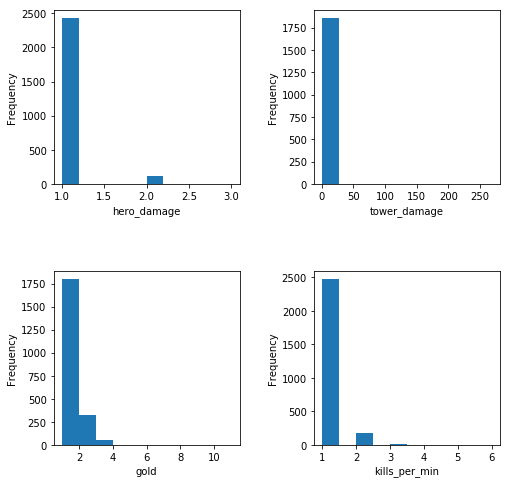

In [19]:
### graph the distribution of the four above features with missing values
from math import floor
fig, axes = plt.subplots(2,2, figsize = (8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.5)
switcher =1 
plots = ['hero_damage', 'tower_damage','gold','kills_per_min']
for idx, value in enumerate(plots):
    switcher ^= 1
    spl = df1[value].value_counts().sort_index().plot.hist(ax = axes[floor(idx/2), switcher])
    axes[floor(idx/2), switcher].set_xlabel(value)
    

Since backpack2 has a lot of missing values (about 60% of the total data), I'll delete this feature. It looks like my missing value features are skewed to the right. 


In [20]:
### drop backpack_2 feature
df1.drop('backpack_2', inplace=True, axis=1)


### Simple Approach for Handing Missing Values

Since the missing values are all numerical features, I will fill in missing values with the  median of their respective features because my features are skewed.

In [21]:
### get the median values for each features
df1.median()

gold              2305.500000
tower_damage      1109.000000
deaths               5.000000
kills_per_min        0.179949
assists             11.000000
level               21.000000
item_5             108.000000
last_hits          188.000000
item_4             102.000000
hero_damage      15243.000000
item_3              98.000000
denies              11.000000
item_1             102.000000
leaver_status        0.000000
dtype: float64

In [22]:
### fill in missing values with each feature's median value
df_simple = df1.copy()
df_simple.fillna(df1.median(), inplace = True).isnull().sum().sort_values(ascending = False)

leaver_status    0
item_1           0
denies           0
item_3           0
hero_damage      0
item_4           0
last_hits        0
item_5           0
level            0
assists          0
kills_per_min    0
deaths           0
tower_damage     0
gold             0
dtype: int64

### Handling Missing Values Using KNN 
The idea behind KNN is that a point of value can be approximated by the values of points closest to it. In other words, the missing values of a feature can be approximated by the values of other features. 

In [23]:
from fancyimpute import KNN
### Fill in missing values using KNN method
df1_filled =KNN(k=5).fit_transform(df1)

C:\Users\tnguy\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/2947 with 0 missing, elapsed time: 1.522
Imputing row 101/2947 with 0 missing, elapsed time: 1.523
Imputing row 201/2947 with 0 missing, elapsed time: 1.523
Imputing row 301/2947 with 0 missing, elapsed time: 1.524
Imputing row 401/2947 with 0 missing, elapsed time: 1.524
Imputing row 501/2947 with 0 missing, elapsed time: 1.525
Imputing row 601/2947 with 0 missing, elapsed time: 1.525
Imputing row 701/2947 with 0 missing, elapsed time: 1.525
Imputing row 801/2947 with 0 missing, elapsed time: 1.526
Imputing row 901/2947 with 0 missing, elapsed time: 1.526
Imputing row 1001/2947 with 0 missing, elapsed time: 1.526
Imputing row 1101/2947 with 0 missing, elapsed time: 1.526
Imputing row 1201/2947 with 0 missing, elapsed time: 1.527
Imputing row 1301/2947 with 0 missing, elapsed time: 1.527
Imputing row 1401/2947 with 0 missing, elapsed time: 1.527
Imputing row 1501/2947 with 0 missing, elapsed time: 1.528
Imputing row 1601/2947 with 0 missing, elapsed time: 1.529
Imputing 

In [24]:
### save my filled data in a variable df1_filled_KNN
df1_filled_KNN = pd.DataFrame(df1_filled, columns = df1.columns, index = df1.index)
missing_gold = df1[df1['gold'].isnull()].index.tolist()
### show what my data with missing values looks like
df1.loc[missing_gold].head()

,gold,tower_damage,deaths,kills_per_min,assists,level,item_5,last_hits,item_4,hero_damage,item_3,denies,item_1,leaver_status
2722,NaN,NaN,8,0.240370,10,25,166,401,116,NaN,263,38,135,0
23806,NaN,NaN,3,0.485830,12,25,160,251,158,NaN,65,18,50,0
23848,NaN,NaN,9,0.255517,11,19,166,180,149,NaN,63,15,172,0
23855,NaN,NaN,6,0.096192,22,18,0,128,63,NaN,172,4,166,0
23884,NaN,NaN,4,0.333598,11,24,63,303,160,NaN,139,26,158,0


In [25]:
### show what my data after being filled looks like
df1_filled_KNN.loc[missing_gold].head()

,gold,tower_damage,deaths,kills_per_min,assists,level,item_5,last_hits,item_4,hero_damage,item_3,denies,item_1,leaver_status
2722,4333.027786,6438.072927,8.0,0.240370,10.0,25.0,166.0,401.0,116.0,41735.607761,263.0,38.0,135.0,0.0
23806,2916.752100,1735.416343,3.0,0.485830,12.0,25.0,160.0,251.0,158.0,18601.315328,65.0,18.0,50.0,0.0
23848,3113.005598,4060.007101,9.0,0.255517,11.0,19.0,166.0,180.0,149.0,17407.336408,63.0,15.0,172.0,0.0
23855,1956.238240,1381.030026,6.0,0.096192,22.0,18.0,0.0,128.0,63.0,13932.531462,172.0,4.0,166.0,0.0
23884,3830.605429,3812.242568,4.0,0.333598,11.0,24.0,63.0,303.0,160.0,25026.765631,139.0,26.0,158.0,0.0


## Training
In this section, I will train a few seperate models and their ensemble model on my trainning dataset. The goal is to classify my wins and losses based on the features I have extracted

In [27]:
### shuffle the data and the label sets then group them into train_data list
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
data, label = shuffle(df1_filled_KNN, df_my_match['win'], random_state=4)
data1, label1 = shuffle(df_simple, df_my_match['win'], random_state=4)
train_data = [data, label]
train_data1 = [data1, label1]
print(train_data[0].shape, train_data[1].shape)
print(train_data1[0].shape, train_data1[1].shape)

(2947, 13) (2947,)
(2947, 13) (2947,)


C:\Users\tnguy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


There are 2947 matches with 13 features corresponding with 2947 labels

In [28]:
### split data and label sets into training, validation and test set (simple method)
from sklearn import preprocessing
(X1,y1) = (train_data1[0], train_data1[1])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=4)
### standardize features for fast and accurate computing
X1_train = preprocessing.scale(X1_train)
X1_test = preprocessing.scale(X1_test)

In [29]:
### split data and label sets into training, validation and test set (KNN method)
(X,y) = (train_data[0], train_data[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
### standardize features for fast and accurate computing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

### Create a logistic regression, a random_forest, a support vectormachine and a model that group the results from the previous 
### three models to classify my win matches.  

### modeling using data from simple method
log_clf1 = LogisticRegression(random_state=4) 
rnd_clf1 = RandomForestClassifier(random_state=4)
svm_clf1 = SVC(probability = True, random_state=4)

voting_clf1 = VotingClassifier(
            estimators = [('lr', log_clf1), ('rf', rnd_clf1), ('svc', svm_clf1)],
            voting = 'hard')
voting_clf1.fit(X1_train, y1_train)
### modeling using data generated by KNN method
log_clf = LogisticRegression(random_state=4)
rnd_clf = RandomForestClassifier(random_state=4)
svm_clf = SVC(probability = True, random_state=4)

voting_clf = VotingClassifier(
            estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
            voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=4, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFore...rbf',
  max_iter=-1, probability=True, random_state=4, shrinking=True, tol=0.001,
  verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [31]:
from sklearn.metrics import accuracy_score
### get accuracy scores from each model

### accuracy scores for models trained on data from simple method
for clf1 in (log_clf1, rnd_clf1, svm_clf1, voting_clf1):
    clf1.fit(X1_train, y1_train)
    y_pred1 = clf1.predict(X1_test)
    print(clf1.__class__.__name__, accuracy_score(y1_test, y_pred1)) 
print('___'*20)
### accuracy scores for models trained on data from KNN method
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 

LogisticRegression 0.8610169491525423
RandomForestClassifier 0.8322033898305085
SVC 0.8559322033898306


C:\Users\tnguy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


VotingClassifier 0.8576271186440678
____________________________________________________________
LogisticRegression 0.8661016949152542
RandomForestClassifier 0.8457627118644068
SVC 0.864406779661017
VotingClassifier 0.8661016949152542


C:\Users\tnguy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The results show that the models trained on data filled with values generated by the KNN method slightly perform better than those trained on data generated by the simple method. The difference is approximately 1% in accuracy score. All four models show pretty similar results. 

In [32]:
## print out feature importances from simple method
for name, score in zip(X.columns, rnd_clf1.feature_importances_):
    print(name,score)
print('_ _ _'*20)
## print out feature importances from KNN method
for name, score in zip(X.columns, rnd_clf.feature_importances_):
    print(name,score)

tower_damage 0.33822217518244385
deaths 0.12719198312343774
kills_per_min 0.07234714800995017
assists 0.10394203083842035
level 0.030498753865165318
item_5 0.031881466851445425
last_hits 0.07095699646093459
item_4 0.04026632373336429
hero_damage 0.06250629740913491
item_3 0.03787464605745757
denies 0.04605965160846679
item_1 0.03513071112898708
leaver_status 0.0031218157307919157
_ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ _
tower_damage 0.36796033740051926
deaths 0.12256386010178213
kills_per_min 0.05670111107387733
assists 0.11513371432952821
level 0.029998796038713933
item_5 0.03342120378501778
last_hits 0.06347843199422007
item_4 0.031158925111883718
hero_damage 0.05674518069460736
item_3 0.039199284542274414
denies 0.04405334398847801
item_1 0.03739227223442823
leaver_status 0.002193538704669674


###  Findings

- **The results show that KNN method perform slightly better than simple missing value handling method.**
- **The four most important features are, in descending order, tower_damge, deaths, kills_per_min, assists. Most important is tower_damage which accounts for 33-36%. This shows that Dota2 is a highly objective game. Therefore, in order to win the games and advance my ranking, I need to prioritize objective goals (specifically destroying my opponents' buildings). Moreover, deaths, kills_per_min, assist are fore features that show the skill level as well as understanding of the game of the players. Generally, in order to achieve objectives, players need to perform well in these fields. However, at my ranking level, players are mostly very skilled and knowledgable in their games. Thus, I can treat these features as independent of tower_damage. It would be interesting to see how these features perform in lower ranked matches.**  

## Conclusions

- ** In order to win and advance in my ranking of Dota2, I need to optimize these four basic features in game: tower_damge, deaths, kills_per_min, assists. The first one is the most important feature and thus is the goal of each game. I need to take priority in taking down my opponents' buildings to win the game. Deaths, kills_per_min and assists rather reflect the personal skill as well as understanding of the game. In order to die less, I obviously need to know how to avoid getting ambushed and know when and where I can engage in combats. Similarly, to increase my kills_per_min and assists, I have to recognize when the appropriate time is to engage in fights and get the most out of it.**
- ** The accuracy score of approximately 87% is pretty good. It accounts for a large majority of the games. However, I didn't take into consideration many feature because of the lack of data which could potentially increase the accuracy score of my model. Thus, one potential field of study is the features that have been eliminated from my analysis due to missing values. It might strike you as trivial how much these features could contribute because my accuracy score is already at 87%. But the truth is, for a small minority of the games, these features are often extremely important because they allow me to surpass the current ranking. When it comes to surpassing the current ranking, more often than not, I will be matched with players of higher calibre( the calibre with which I want to be in). Thus, the players in these matches are generally good at optimizing the for basic features. If one wants to win the game, one needs to outperform their opponents in some features. Therefore, the eliminated features from my analysis could help shed light on how to surpass the rank when there is a chance.** 
- ** The analysis I performed was based on data of public matches where people might or might not put their 100 percent in each game. However, in professional matches, all the players will put their best effort in winning the game. Hence, another potential field to perform analysis is in professional matches.**